In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [2]:
def Canny_detector (img, weak_th = None, strong_th = None):
    # Konversi gambar ke abu abu
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Langkah pengurangan noise
    img = cv2.GaussianBlur(img, (5,5), 1.4)

    # Menghitung Gradient
    gx = cv2.Sobel(np.float32(img), cv2.CV_32F, 1, 0, 3)
    gy = cv2.Sobel(np.float32(img), cv2.CV_32F, 0, 1, 3)

    # Konversi koordinat kartesius 
    mag, ang = cv2.cartToPolar(gx, gy, angleInDegrees=True)

    #mengatur ambang batas minimum dan maksimum 
    mag_max = np.max(mag)
    if not weak_th: weak_th = mag_max * 0.1
    if not strong_th: strong_th = mag_max * 0.5

    # mendapatkan dimensi gambar masukan
    height, width = img.shape

    # Mengulangi piksel abu-abu
    for i_x in range(width):
        for i_y in range(height):
            grad_ang = ang[i_y, i_x]
            grad_ang = abs(grad_ang-180) if abs(grad_ang)>180 else abs(grad_ang)

            # memilih tetangga piksel target yang sesuai dengan arah gradien dalam sumbu x

            if grad_ang <= 22.5:
                neighb_1_x, neighb_1_y = i_x-1, i_y
                neighb_2_x, neighb_2_y = i_x + 1, i_y

            # arah kanan atas (diagonal-1).
            elif grad_ang > 22.5 and grad_ang<=(22.5 + 45):
                neighb_1_x, neighb_1_y = i_x-1, i_y - 1
                neighb_2_x, neighb_2_y = i_x + 1, i_y + 1
            
            # dalam arah sumbu y
            elif grad_ang>(22.5 + 45) and grad_ang<=(22.5 + 90):
                neighb_1_x, neighb_1_y = i_x, i_y - 1
                neighb_2_x, neighb_2_y = i_x, i_y + 1
            
            # arah kiri atas (diagonal-2)
            elif grad_ang>(22.5 + 90) and grad_ang<=(22.5 + 135):
                neighb_1_x, neighb_1_y = i_x - 1, i_y + 1
                neighb_2_x, neighb_2_y = i_x + 1, i_y - 1

            # Siklus dimulai ulang
            elif grad_ang>(22.5 + 135) and grad_ang<=(22.5 + 180):
                neighb_1_x, neighb_1_y = i_x - 1, i_y
                neighb_2_x, neighb_2_y = i_x + 1, i_y

            # Langkah penekanan tidak maksimal
            if width>neighb_1_x>=0 and height>neighb_1_y>=0:
                if mag[i_y, i_x] < mag[neighb_1_y, neighb_1_x]:
                    mag[i_y, i_x] = 0
                    continue
            
            if width>neighb_2_x>=0 and height>neighb_2_y>=0:
                if mag[i_y, i_x] < mag[neighb_2_y, neighb_2_x]:
                    mag[i_y, i_x] = 0
    
    weak_ids = np.zeros_like(img)
    strong_ids = np.zeros_like(img)

    ids = np.zeros_like(img)

    # langkah ambang batas ganda
    for i_x in range(width):
        for i_y in range(height):
            grad_mag = mag[i_y, i_x]

            if grad_mag < weak_th:
                mag[i_y, i_x] = 0
            elif strong_th>grad_mag>=weak_th:
                ids[i_y, i_x] = 1
            else:
                ids[i_y, i_x] = 2

    return mag

In [3]:
frame = cv2.imread('spongebob.jpg')

In [4]:
# memanggil fungsi yang dirancang untuk menemukan tepian
canny_img = Canny_detector(frame)

In [5]:
# memanggil fungsi yang dirancang untuk menemukan tepian
canny_img = Canny_detector(frame)

<Figure size 640x480 with 0 Axes>

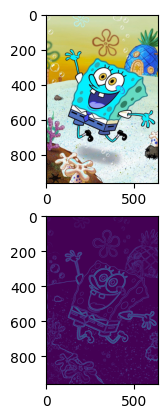

In [6]:
# menampilkan gambar masukan dan keluaran
plt.figure()
f, plots = plt.subplots(2, 1)
plots[0].imshow(frame)
plots[1].imshow(canny_img)